In [21]:
weather = pd.read_csv("../weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])
station = weather[weather['station_nbr'] == 1]

In [22]:
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
1030,1,2014-10-27,61.0,41.0,51.0,NaN,38.0,44.0,14.0,0.0,...,27,60.947558,48.266239,NaN,0,0,0,0,0,1
1031,1,2014-10-28,65.0,37.0,51.0,NaN,45.0,48.0,14.0,0.0,...,28,79.853021,50.316460,NaN,1,0,1,1,0,0
1032,1,2014-10-29,66.0,48.0,57.0,NaN,51.0,53.0,8.0,0.0,...,29,80.320545,56.738033,NaN,2,0,2,1,0,0
1033,1,2014-10-30,57.0,39.0,48.0,NaN,39.0,43.0,17.0,0.0,...,30,70.872191,46.795606,NaN,3,0,0,0,0,1
1034,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,0,0,1


In [23]:
len(station)

1035

In [24]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 1035 ( 100.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 4 ( 0.39 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 1035 ( 100.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [25]:
train = pd.read_csv("../data/train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [26]:
key = pd.read_csv("../data/key.csv")
station = station.merge(key)

In [27]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,107,0
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,108,0
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,109,0
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,110,0
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,111,0


In [28]:
station['log1p_units'] = np.log1p(station.units)

In [29]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 다시 OLS

In [30]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,107
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,108
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,109
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,110
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,111


In [31]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

### 1. OLS : df1 (units) 

In [79]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility + windchill + weekend \
                            + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     961.6
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:25:13   Log-Likelihood:            -2.2815e+05
No. Observations:              102675   AIC:                         4.567e+05
Df Residuals:                  102501   BIC:                         4.583e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]     -2.4015      1

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [36]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     961.6
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:01:54   Log-Likelihood:            -2.2815e+05
No. Observations:              102675   AIC:                         4.567e+05
Df Residuals:                  102501   BIC:                         4.583e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [37]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

1173

In [38]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,1,0
1,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,2,0
2,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,3,0
3,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,4,0
4,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,5,0
5,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,6,0
6,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,7,0
7,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,8,0
8,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,9,29
9,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,10,0


In [39]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1123.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:03:46   Log-Likelihood:            -1.2877e+05
No. Observations:              101508   AIC:                         2.579e+05
Df Residuals:                  101334   BIC:                         2.596e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

R square 약간 상승, conditional number에 전혀 변화가 없다...

### 4. 변수변환 : df2 (log1p_units) 

In [40]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2211.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:04:25   Log-Likelihood:                 31839.
No. Observations:              102675   AIC:                        -6.333e+04
Df Residuals:                  102501   BIC:                        -6.167e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야할 거 같다.

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [41]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

2892

In [42]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,1,0.000000
1,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,2,0.000000
2,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,3,0.000000
3,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,4,0.000000
4,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,5,0.000000
5,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,6,0.000000
6,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,7,0.000000
7,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,8,0.000000
8,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,9,3.401197
9,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,10,0.000000


In [59]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3855.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:26:11   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99622   BIC:                        -2.107e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

설명력이 더 올라갔다.(0.870), conditional number는 그대로

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [44]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3855.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:06:02   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99622   BIC:                        -2.107e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

변화없음.(5번 결과와 동일)

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg제거(VIF에 근거)

In [56]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3900.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:23:04   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99624   BIC:                        -2.107e+05
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

그래도 conditional number가 243....

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거)

In [66]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3946.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:36:36   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99626   BIC:                        -2.107e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

wetbulb, dewpoint추가로 지웠더니 conditional number 20감소...(?!)

### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

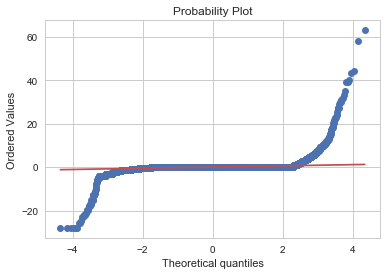

In [80]:
sp.stats.probplot(result1_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

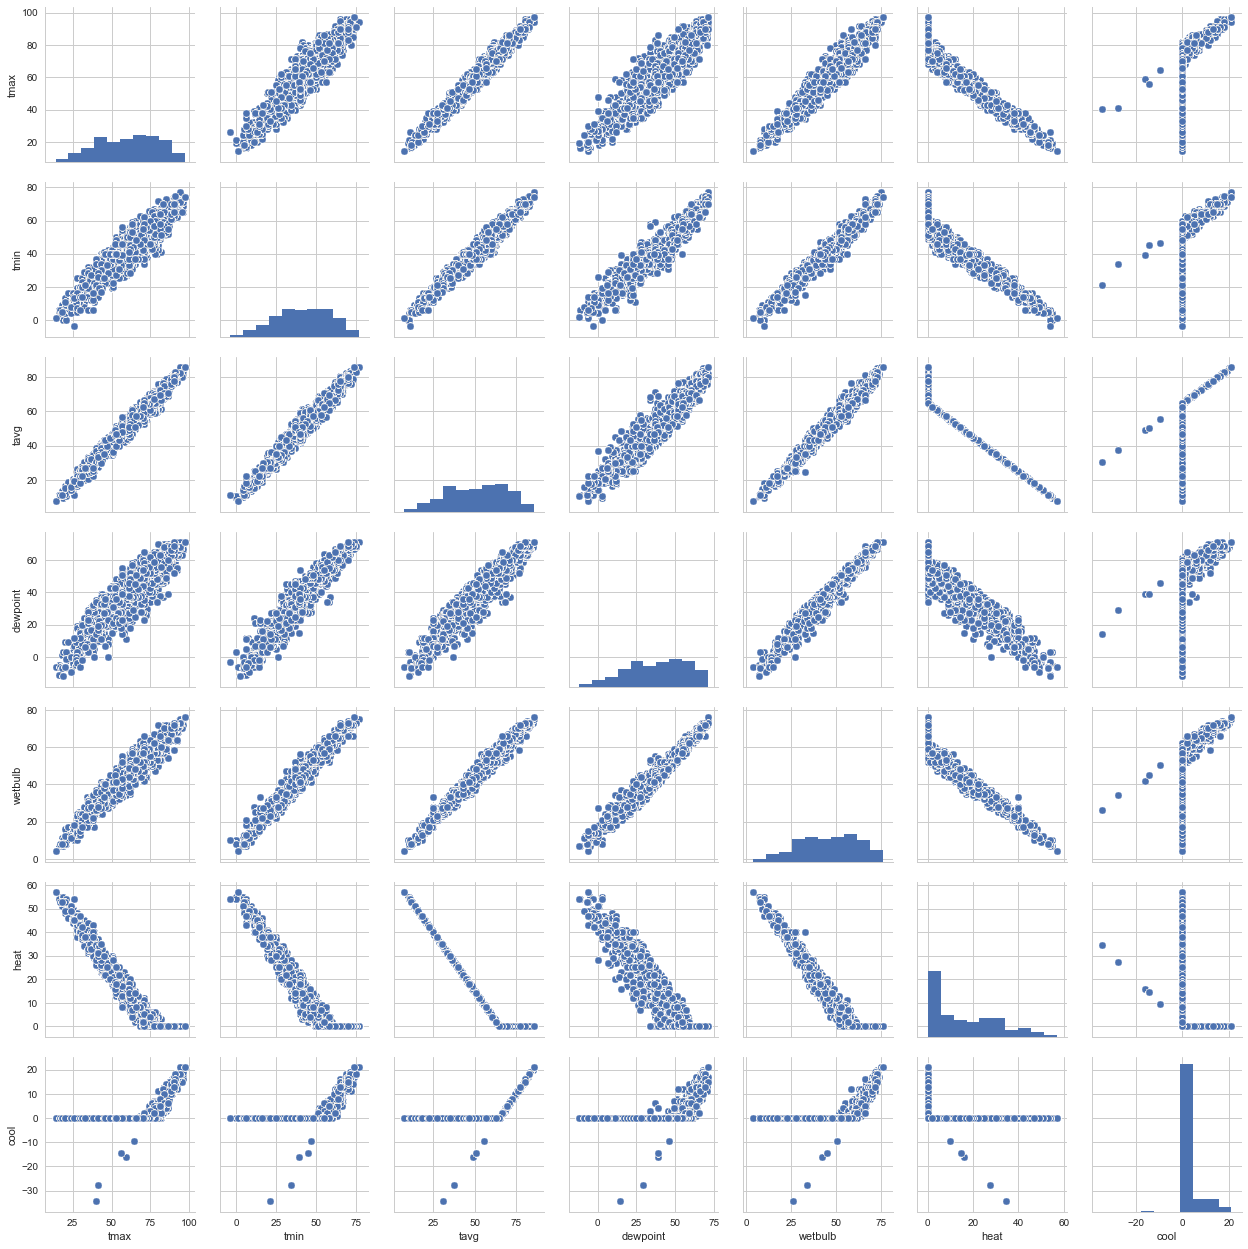

In [50]:
cols = ['tmax','tmin','tavg','dewpoint','wetbulb','heat','cool']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]
sns.pairplot(sample)
plt.show()

tmax~cool까지 강한 상관관계를 보인다.

In [51]:
sample = pd.concat([sampleX, sampley], axis=1)
model_sample = sm.OLS.from_formula("log1p_units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool", data=sample)
result_sample = model_sample.fit()
print(result_sample.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.835
Date:                Wed, 04 Jul 2018   Prob (F-statistic):             0.0880
Time:                        15:16:49   Log-Likelihood:                 4687.3
No. Observations:              100227   AIC:                            -9361.
Df Residuals:                  100220   BIC:                            -9294.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0218      0.032     -0.686      0.4

##### VIF : 1) 먼저 tmax, tmin, tavg, dewpoint, wetbulb, heat, cool로 VIF를 돌려본다.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,tmax
1,inf,tmin
2,inf,tavg
3,328.101742,dewpoint
4,2247.245730,wetbulb
5,4.517960,heat
6,1.806838,cool


tmax, tmin, tavg를 빼고 df2_1을 다시 OLS돌려본다(위로위로~)

##### VIF : 2) dewpoint, wetbulb, heat, cool로 VIF를 돌려본다.

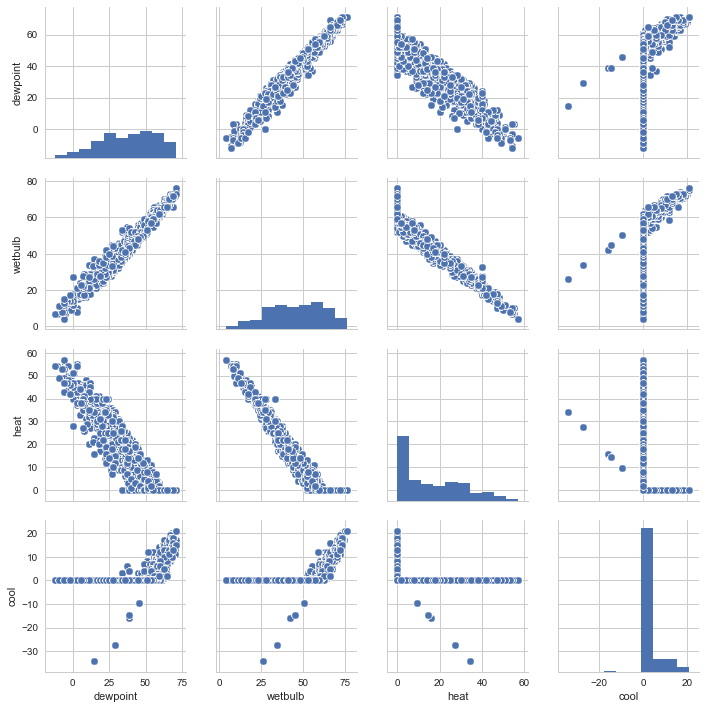

In [64]:
cols = ['dewpoint','wetbulb','heat','cool']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]
sns.pairplot(sampleX)
plt.show()

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,111.245887,dewpoint
1,122.696099,wetbulb
2,3.011512,heat
3,1.673031,cool


df2_1에서 wetbulb, dewpoint를 제거하고 OLS돌려본다.

### VIF : 3) heat~나머지의 correlation을 보자.

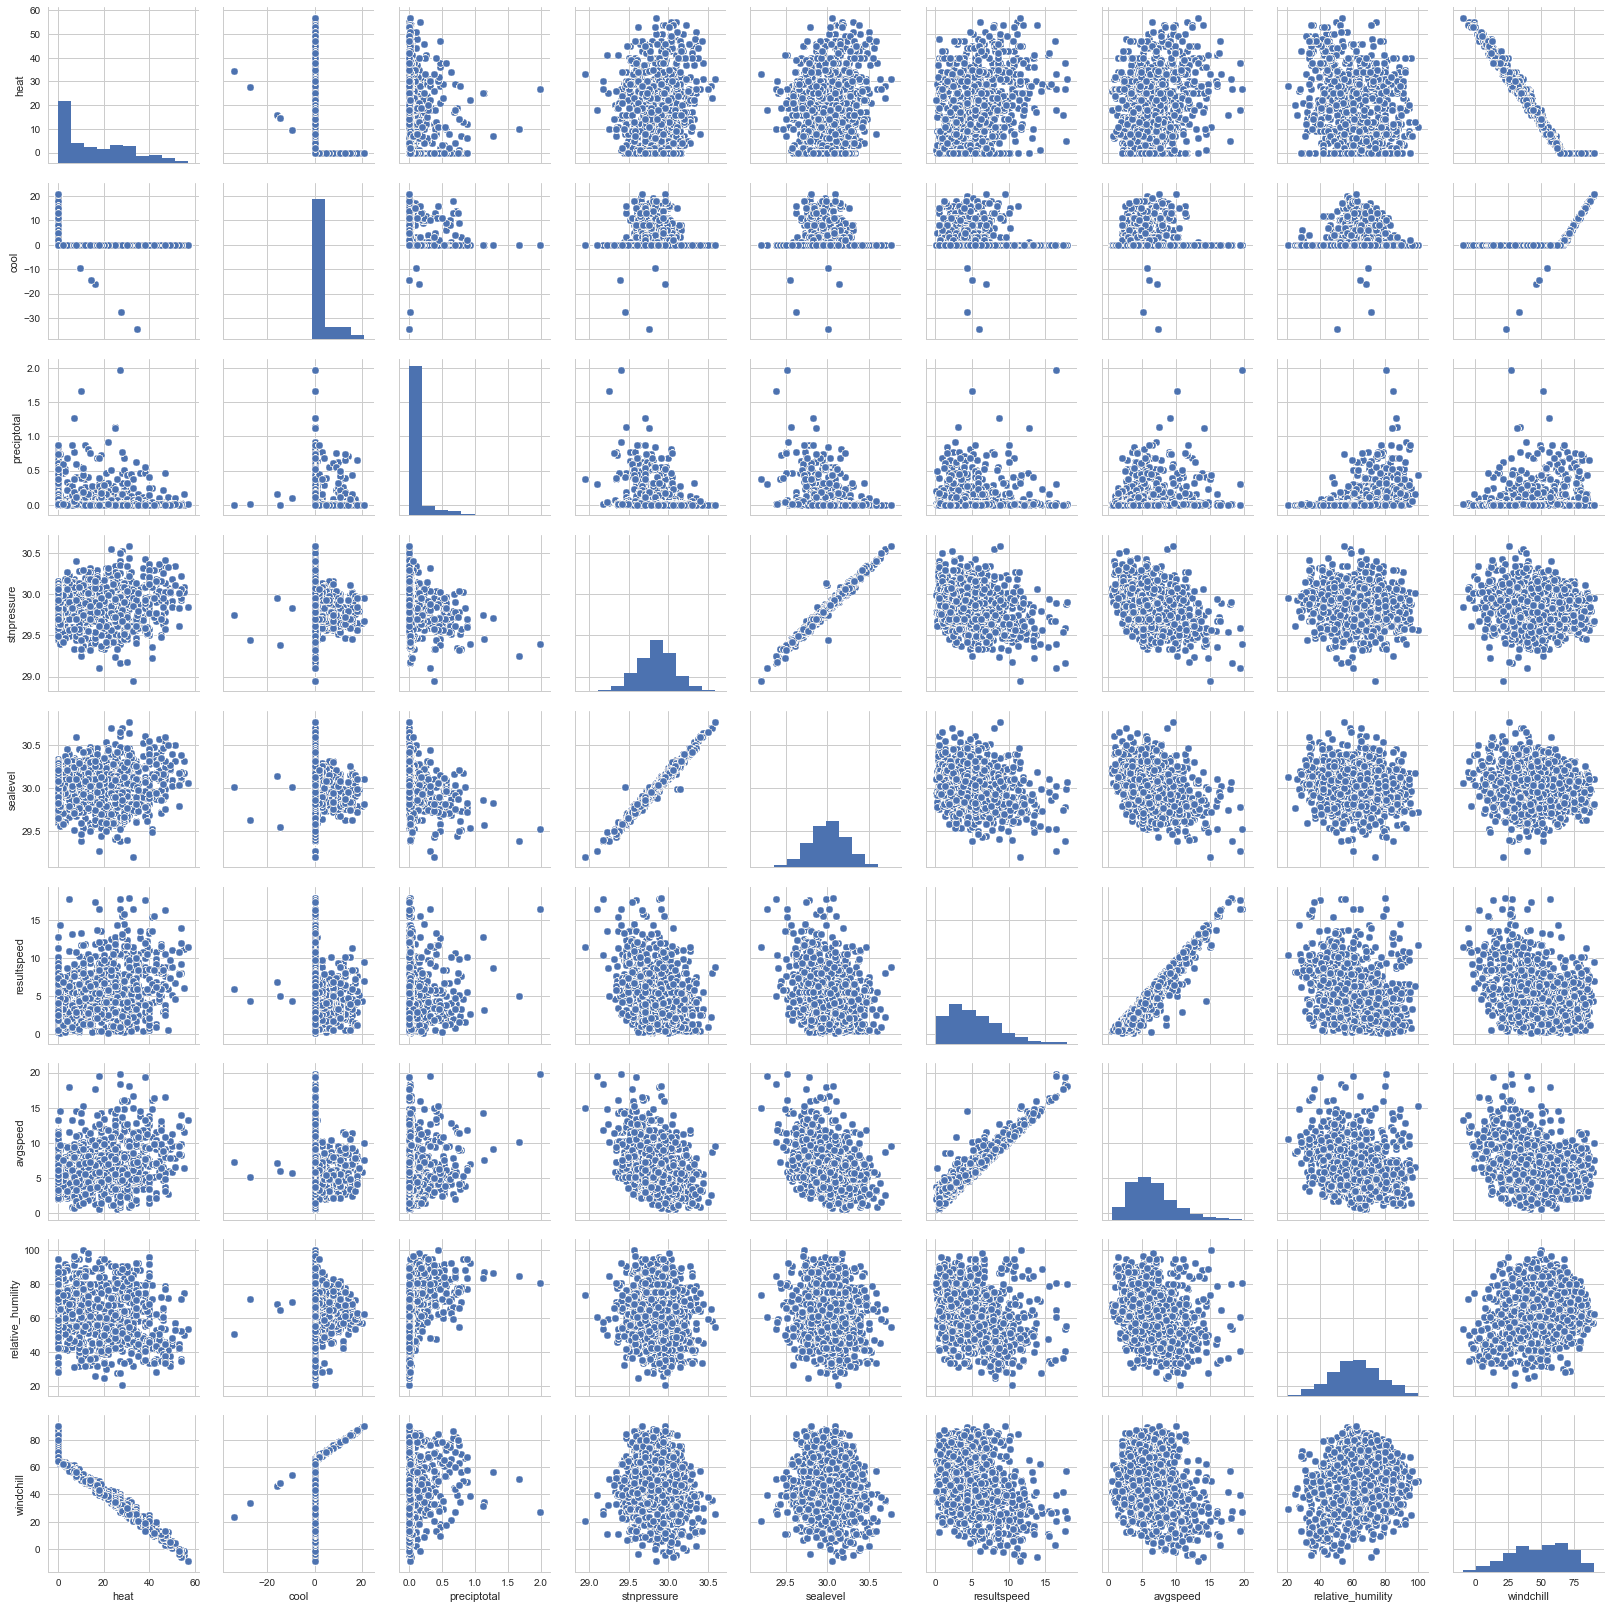

In [67]:
cols = ['heat','cool','preciptotal','stnpressure','sealevel','resultspeed','avgspeed','relative_humility','windchill']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]
sns.pairplot(sampleX)
plt.show()

상관관계를 보이는 것들
- stnpressure - sealevel
- resultspeed - avgspeed
- heat/cool - windchill

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,172.902746,heat
1,7.534778,cool
2,1.677520,preciptotal
3,974457.321684,stnpressure
4,976811.429431,sealevel
5,46.179156,resultspeed
6,72.949502,avgspeed
7,27.288752,relative_humility
8,692.387558,windchill


### case1:
- 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) + sealevel/stnpressure제거

In [71]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3993.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:00:24   Log-Likelihood:             1.0633e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99628   BIC:                        -2.107e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### case2:
- 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) + sealevel/stnpressure제거 + resultdir제거(전부 p-value가 유의하지 않음)

In [77]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     4946.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:44:16   Log-Likelihood:             1.0580e+05
No. Observations:              100227   AIC:                        -2.113e+05
Df Residuals:                  100094   BIC:                        -2.101e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

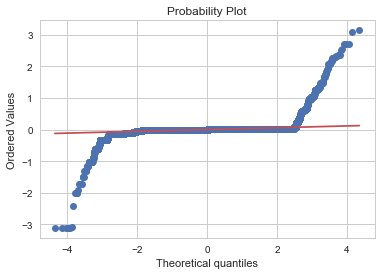

In [78]:
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

conditional number 27감소

### case3:
- 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) + sealevel/stnpressure제거 + resultdir제거(전부 p-value가 유의하지 않음) + item_nbr제거(하나빼고 다 유의하지 않음)

In [75]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.625
Date:                Wed, 04 Jul 2018   Prob (F-statistic):             0.0324
Time:                        16:06:16   Log-Likelihood:                 4699.6
No. Observations:              100227   AIC:                            -9353.
Df Residuals:                  100204   BIC:                            -9134.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

- R square 0.000, conditional number 30.6. 
- conditional을 확 줄이는 대신 R square도 확 증발시킴.

##### 9.  다중공선성 감소시키기 : PCA

In [166]:
from patsy import dmatrix
formula = "scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) \
        + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) \
        + scale(avgspeed) + scale(relative_humility) + scale(windchill) + C(item_nbr) \
        + C(store_nbr) + C(weekend) + C(rainY) + C(otherY) + C(nothing) + 0"

In [184]:
dfX = dmatrix(formula, station, return_type="dataframe")
dfy = pd.DataFrame(target1, columns=["units"])

In [185]:
idx = list(set(range(len(df2))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

##### ***tmax, tmin빠져서 conditional number 감소

In [187]:
model_units = sm.OLS(np.log1p(dfy), dfX)
result_units = model_units.fit()
print(result_units.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     5177.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:12:26   Log-Likelihood:             1.0576e+05
No. Observations:              100227   AIC:                        -2.113e+05
Df Residuals:                  100100   BIC:                        -2.101e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(item_nbr)[1]          

In [192]:
from sklearn.decomposition import PCA

In [222]:
dfX2 = sm.add_constant(pd.DataFrame(PCA(n_components=25).fit_transform(dfX)))
model_units2 = sm.OLS(np.log1p(dfy), dfX2)
result_units2 = model_units2.fit()
print(result_units2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9492
Date:                Tue, 03 Jul 2018   Prob (F-statistic):              0.535
Time:                        22:32:55   Log-Likelihood:                 4693.6
No. Observations:              100227   AIC:                            -9335.
Df Residuals:                  100201   BIC:                            -9088.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0216      0.001     29.595      0.0

R square가 0.00....

##### 9.  다중공선성 감소시키기 : 정규화

In [251]:
# 6번 model 사용
# 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)
result2 = model2_1_1.fit_regularized(alpha=0.001, L1_wt=0)

In [252]:
result2.params[result2.params>0]

array([  3.58580529e-02,   3.99312686e-03,   1.57665750e-03,
         2.11581000e-04,   3.58340176e-05,   4.76181011e-04,
         1.89128572e-03,   9.86646007e-04,   7.60515755e-04,
         5.47372719e-04,   1.60316771e-03,   5.26146706e-04,
         1.60817896e-03,   3.43405592e-03,   2.19358654e-03,
         2.68244675e-04,   2.21284910e-03,   9.75160150e-04,
         4.82601106e-03,   3.15856468e-03,   2.47061093e-03,
         1.18650669e-03,   1.71886890e-04,   5.04179686e-04,
         1.67009949e-03,   6.95788229e-05,   2.45767337e-03,
         6.47912182e-03,   6.29617307e-03,   4.51900328e-03,
         1.89608259e-03,   2.36286988e+00,   1.38127288e+00,
         2.06362800e-02,   2.82759464e-01,   6.68210348e-02,
         9.56244084e-03,   8.60860426e-02,   3.21597242e-04,
         2.73822032e-04,   3.04356962e-04,   3.79611132e-03,
         5.91182647e-03,   2.69448899e-04,   9.29692978e-04,
         1.39670268e-03,   2.23730090e-03])

In [113]:
# station = station[station["units"] > 0].reset_index(drop=True)

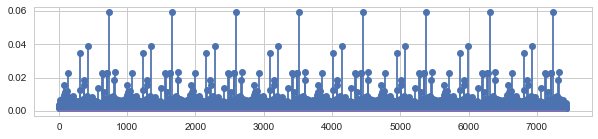

In [150]:
# set(range(len(station)))
# len(stn_real)
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

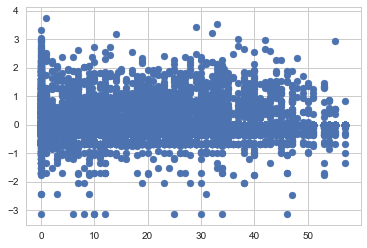

In [169]:
# 이분산성 확인
plt.scatter(df['heat'], result.resid)
plt.show()

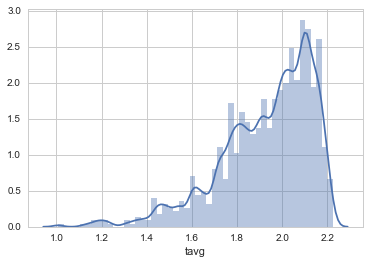

In [185]:
sns.distplot((np.log(np.sqrt(station['tavg']))))
plt.show()